In [1]:
import nltk
from nltk.util import bigrams
from nltk.util import pad_sequence
from nltk.lm.preprocessing import pad_both_ends
from nltk.util import everygrams
from nltk.lm.preprocessing import flatten
from nltk.lm import MLE
from nltk.lm.preprocessing import padded_everygram_pipeline
import sklearn
from nltk.classify import scikitlearn
import csv
import pandas as pd
from nltk import word_tokenize
nltk.download('punkt')
from nltk.lm import Laplace
import re
from sklearn.linear_model import LogisticRegression
# !pip install texthero
# !pip install brew

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\brown\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# from google.colab import drive

# drive.mount("/content/drive")

## 1. Viewing Training Data

### i. Argument Training Set

In [2]:
# df = pd.read_csv("/content/arguments-training.tsv", sep='\t')
# df = pd.read_csv('/content/drive/MyDrive/NLP_Project_HumanValues/Human_Val_Dataset/arguments-training.tsv', sep = '\t')
df = pd.read_csv("Human_Val_Dataset/arguments-training.tsv", sep='\t')
df

,Argument ID,Conclusion,Stance,Premise
0,A01001,Entrapment should be legalized,in favor of,if entrapment can serve to more easily capture...
1,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...
2,A01003,We should abandon marriage,against,marriage is the ultimate commitment to someone...
3,A01004,We should ban naturopathy,against,it provides a useful income for some people
4,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...
...,...,...,...,...
5215,D27096,Nepotism exists in Bollywood,against,Star kids also have an upbringing which is sur...
5216,D27097,Nepotism exists in Bollywood,in favor of,Movie stars of Bollywood often launch their ch...
5217,D27098,India is safe for women,in favor of,Evil historic practices on women in the pre an...
5218,D27099,India is safe for women,in favor of,Women of our country have been and are achievi...


### ii. Training Label Dataset

In [3]:
# arg_df = pd.read_csv('/content/drive/MyDrive/NLP_Project_HumanValues/Human_Val_Dataset/labels-training.tsv', sep='\t')
arg_df = pd.read_csv("Human_Val_Dataset/labels-training.tsv", sep='\t')
arg_df

,Argument ID,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,...,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A01002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A01003,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A01004,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,A01005,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,D27096,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5216,D27097,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5217,D27098,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5218,D27099,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### a. Creating Dictionary of class categories

In [4]:
Class_list = list(arg_df.columns.values[1:])
print(Class_list)

['Self-direction: thought', 'Self-direction: action', 'Stimulation', 'Hedonism', 'Achievement', 'Power: dominance', 'Power: resources', 'Face', 'Security: personal', 'Security: societal', 'Tradition', 'Conformity: rules', 'Conformity: interpersonal', 'Humility', 'Benevolence: caring', 'Benevolence: dependability', 'Universalism: concern', 'Universalism: nature', 'Universalism: tolerance', 'Universalism: objectivity']


In [5]:
class_dict = {}
n = 0

for category in Class_list:
    class_dict[n] = category
    n += 1

print(class_dict)

{0: 'Self-direction: thought', 1: 'Self-direction: action', 2: 'Stimulation', 3: 'Hedonism', 4: 'Achievement', 5: 'Power: dominance', 6: 'Power: resources', 7: 'Face', 8: 'Security: personal', 9: 'Security: societal', 10: 'Tradition', 11: 'Conformity: rules', 12: 'Conformity: interpersonal', 13: 'Humility', 14: 'Benevolence: caring', 15: 'Benevolence: dependability', 16: 'Universalism: concern', 17: 'Universalism: nature', 18: 'Universalism: tolerance', 19: 'Universalism: objectivity'}


## 2. Exploratory Data Analysis

In [6]:
# Data visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

In [7]:
arg_df.describe()

,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
count,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000
mean,0.174904,0.255172,0.059770,0.038697,0.268199,0.088314,0.108429,0.071648,0.375670,0.311686,0.114559,0.234100,0.041571,0.083908,0.287356,0.146743,0.381609,0.068582,0.135824,0.179502
std,0.379922,0.436000,0.237083,0.192891,0.443064,0.283778,0.310951,0.257928,0.484342,0.463227,0.318520,0.423475,0.199626,0.277276,0.452573,0.353884,0.485828,0.252767,0.342634,0.383809
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Count of positive examples for each category(human value)

In [8]:
# count_df = pd.DataFrame(columns=['Category', 'Count'])
rows = []
for col in arg_df.keys():
    if col == 'Argument ID':
        continue
    # print(col + ":" + str(arg_df[col].value_counts()[1]))
    rows.append({'Category':col, 'Count':(arg_df[col].value_counts()[1])})
count_df = pd.DataFrame.from_dict(rows, orient='columns')
count_df

,Category,Count
0,Self-direction: thought,913
1,Self-direction: action,1332
2,Stimulation,312
3,Hedonism,202
4,Achievement,1400
5,Power: dominance,461
6,Power: resources,566
7,Face,374
8,Security: personal,1961
9,Security: societal,1627


### Count as percentage

In [9]:
rows = []
for col in arg_df.keys():
    if col == 'Argument ID':
        continue
    rows.append({'Category':col, 'Count':str(arg_df[col].value_counts(normalize=True)[1]*100)})
normalized_count_df = pd.DataFrame.from_dict(rows, orient='columns')
# normalized_count_df.head()
# normalized_count_df.sort_values('Count')
normalized_count_df.sort_values(by=['Count'], ascending=True)

,Category,Count
6,Power: resources,10.842911877394636
10,Tradition,11.455938697318008
18,Universalism: tolerance,13.582375478927203
15,Benevolence: dependability,14.67432950191571
0,Self-direction: thought,17.490421455938698
19,Universalism: objectivity,17.950191570881227
11,Conformity: rules,23.409961685823756
1,Self-direction: action,25.517241379310345
4,Achievement,26.81992337164751
14,Benevolence: caring,28.735632183908045


### Visualizing the counts

<AxesSubplot:xlabel='Category'>

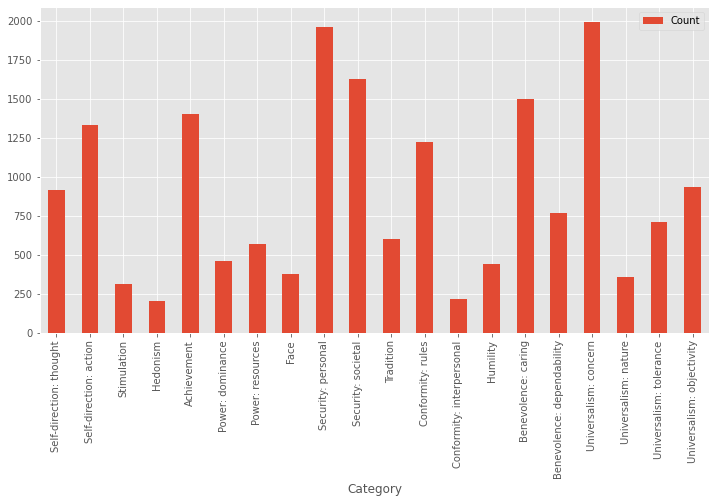

In [10]:
count_df.plot(x='Category', y='Count', kind='bar')

## 3. Basic Preprocessing Dataset

### i. Converting 'Stance' Column to Binary Encoding

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [12]:
## Prep_df is a copy of df
prep_df = df.copy()

le.fit(prep_df['Stance'])
print(le.classes_)

['against' 'in favor of']


In [13]:
prep_df['Stance'] = le.transform(prep_df['Stance'])
prep_df.head()

,Argument ID,Conclusion,Stance,Premise
0,A01001,Entrapment should be legalized,1,if entrapment can serve to more easily capture...
1,A01002,We should ban human cloning,1,we should ban human cloning as it will only ca...
2,A01003,We should abandon marriage,0,marriage is the ultimate commitment to someone...
3,A01004,We should ban naturopathy,0,it provides a useful income for some people
4,A01005,We should ban fast food,1,fast food should be banned because it is reall...


#### ii. Preprocessing 'Conclusion' and 'Premise' of Argument dataset

- Punctuation removal
- Stopword removal
- Vectorization

In [14]:
### Use prep_df as the dataset

In [15]:
#Removing punction on 'Conclusion' and 'Premise' column on prep_df 
prep_df['Conclusion'] = prep_df['Conclusion'].str.replace(r'[^\w\s]+', '')
prep_df['Premise'] = prep_df['Premise'].str.replace(r'[^\w\s]+', '')

C:\Users\brown\AppData\Local\Temp\ipykernel_14320\1664000197.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  prep_df['Conclusion'] = prep_df['Conclusion'].str.replace(r'[^\w\s]+', '')
C:\Users\brown\AppData\Local\Temp\ipykernel_14320\1664000197.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  prep_df['Premise'] = prep_df['Premise'].str.replace(r'[^\w\s]+', '')


In [16]:
#Lowercase 'Conclusion' and 'Premise' column on prep_df 
prep_df.loc[:, 'Conclusion'] = prep_df.Conclusion.str.lower()
prep_df.loc[:, 'Premise'] = prep_df.Premise.str.lower()

In [17]:
prep_df

,Argument ID,Conclusion,Stance,Premise
0,A01001,entrapment should be legalized,1,if entrapment can serve to more easily capture...
1,A01002,we should ban human cloning,1,we should ban human cloning as it will only ca...
2,A01003,we should abandon marriage,0,marriage is the ultimate commitment to someone...
3,A01004,we should ban naturopathy,0,it provides a useful income for some people
4,A01005,we should ban fast food,1,fast food should be banned because it is reall...
...,...,...,...,...
5215,D27096,nepotism exists in bollywood,0,star kids also have an upbringing which is sur...
5216,D27097,nepotism exists in bollywood,1,movie stars of bollywood often launch their ch...
5217,D27098,india is safe for women,1,evil historic practices on women in the pre an...
5218,D27099,india is safe for women,1,women of our country have been and are achievi...


In [18]:
# nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Filtering stop words for  prep_df['Conclusion'] 
# prep_df['Conclusion'] = [x.split() for x in prep_df['Conclusion']]

# prep_df['Conclusion']  = [[w for w in x if w not in stopwords.words('english')] for x in prep_df['Conclusion']]


# Filtering stop words for  prep_df['Premise'] 
# prep_df['Premise'] = [x.split() for x in prep_df['Premise']]

# prep_df['Premise']  = [[w for w in x if w not in stopwords.words('english')] for x in prep_df['Premise']]

for idx,row in prep_df.iterrows():
    copyConc = prep_df.loc[idx,'Conclusion'].split(' ')
    copyPremise = prep_df.loc[idx,'Premise'].split(' ')
    newConc = ''
    newPrem = ''
    for word in copyConc:
        if word not in stopwords.words('english'):
            newConc = newConc+' '+word
        prep_df.loc[idx,'Conclusion'] = newConc
        
    for word in copyPremise:
        if word not in stopwords.words('english'):
            newPrem = newPrem+' '+word
        prep_df.loc[idx,'Premise'] = newPrem

prep_df

,Argument ID,Conclusion,Stance,Premise
0,A01001,entrapment legalized,1,entrapment serve easily capture wanted crimin...
1,A01002,ban human cloning,1,ban human cloning cause huge issues bunch hum...
2,A01003,abandon marriage,0,marriage ultimate commitment someone people w...
3,A01004,ban naturopathy,0,provides useful income people
4,A01005,ban fast food,1,fast food banned really bad health costly
...,...,...,...,...
5215,D27096,nepotism exists bollywood,0,star kids also upbringing surrounded bollywoo...
5216,D27097,nepotism exists bollywood,1,movie stars bollywood often launch children m...
5217,D27098,india safe women,1,evil historic practices women pre post mediev...
5218,D27099,india safe women,1,women country achieving epitomes success glor...


#### iii. Splitting dataset intro Train and Test

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
final_df = prep_df.merge(arg_df, on = 'Argument ID')

In [24]:
final_df2 = final_df.drop('Argument ID', axis = 1)

In [25]:
X = final_df2.iloc[:, 0:3]
X.head()

,Conclusion,Stance,Premise
0,entrapment legalized,1,entrapment serve easily capture wanted crimin...
1,ban human cloning,1,ban human cloning cause huge issues bunch hum...
2,abandon marriage,0,marriage ultimate commitment someone people w...
3,ban naturopathy,0,provides useful income people
4,ban fast food,1,fast food banned really bad health costly


In [26]:
Y = final_df2.iloc[:, 3:]
Y.head()

,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


#### iv. Splitting into Train/Test sets

In [27]:
x_train, x_test, y_train, y_test=train_test_split(X, Y, train_size=0.75, random_state=42)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import accuracy_score, precision_score
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec  
from collections import Counter
import gensim.downloader

## Loading Pretrained Word2vec model
word2vec1 = gensim.downloader.load('word2vec-google-news-300')

#### v. TF-IDF Vectorization of Text Columns

In [29]:
tfidf = TfidfVectorizer()

transformed_Concs = tfidf.fit_transform(x_train['Conclusion'])
test_Concs        = tfidf.transform(x_test['Conclusion'])


transformed_Prems  = tfidf.fit_transform(x_train['Premise'])
test_Prems        = tfidf.transform(x_test['Premise'])

In [30]:
x_train.head()

,Conclusion,Stance,Premise
4927,ban missionary work,0,missionaries help feed hungry build housing e...
5000,limit judicial activism,0,judicial activism shouldnt limited allows jud...
2213,stop development autonomous cars,0,autonomous car development continued help fin...
2119,ban whaling,0,whaling provides food fuel many people
4663,homeschooling banned,1,homeschooling regulated nobody sure kids lear...


#### vi. Word2Vec Vectorization of Text Columns

In [47]:
def word2vec_Preprocessing(dataset):
    conclusions = []
    premises = []
    
    for conclusion in (dataset['Conclusion']):
        print(conclusion)
        vectorSum = 0
        vectorCount = 0
        for word in conclusion:
            if word in word2vec1.vocab:
                vector = word2vec1.get_vector(word).mean()
#                 print(vector)
                vectorSum = vectorSum + vector
                vectorCount += 1
        VectorAvg1 = vectorSum/vectorCount
        print('Vector Avg is: ', VectorAvg1)
        conclusions.append(VectorAvg1)

    for premise in (dataset['Premise']):
        vectorSum = 0
        vectorCount = 0
        for word in conclusion:
            if word in word2vec1.vocab:
                vector = word2vec1.get_vector(word).mean()
                vectorSum = vectorSum + vector
                vectorCount += 1
        VectorAvg2 = vectorSum/vectorCount
        premises.append(VectorAvg2)
        
    return conclusions, premises

In [48]:
trainW2V_conclusions, trainW2V_premises = word2vec_Preprocessing(x_train)
testW2V_conclusions, testW2V_premises = word2vec_Preprocessing(x_test)

 ban missionary work
Vector Avg is:  -0.0019526617446293433
 limit judicial activism
Vector Avg is:  -0.00301087121969383
 stop development autonomous cars
Vector Avg is:  -0.003188435790232486
 ban whaling
Vector Avg is:  -0.004425388295203447
 homeschooling banned
Vector Avg is:  -0.0040679311302180094
 abolish threestrikes laws
Vector Avg is:  -0.005063479721900963
 homeopathy brings harm good
Vector Avg is:  -0.003419825595549562
 end racial profiling
Vector Avg is:  -0.005490254596224986
 ban factory farming
Vector Avg is:  -0.0031116841793326394
 homeopathy brings harm good
Vector Avg is:  -0.003419825595549562
 vow celibacy abandoned
Vector Avg is:  -0.0023484802804887295
 social media brings harm good
Vector Avg is:  -0.0021828603189946575
 censorship movies outdated concept
Vector Avg is:  -0.0035526979016140105
 subsidize wikipedia
Vector Avg is:  -0.005032499471460195
 abandon use school uniform
Vector Avg is:  -0.0032443830277770758
 introduce compulsory voting
Vector Avg i

Vector Avg is:  -0.0026421304889178523
 legalize organ trade
Vector Avg is:  -0.006904559318597118
 cancel pride parades
Vector Avg is:  -0.004559700920556982
 abolish zoos
Vector Avg is:  -0.0013987635029479861
 ban factory farming
Vector Avg is:  -0.0031116841793326394
 subsidize space exploration
Vector Avg is:  -0.0037168114238580606
 adopt zerotolerance policy schools
Vector Avg is:  -0.004048528077466221
 subsidize wikipedia
Vector Avg is:  -0.005032499471460195
 abolish threestrikes laws
Vector Avg is:  -0.005063479721900963
 end mandatory retirement
Vector Avg is:  -0.005504278058651835
 ban church scientology
Vector Avg is:  -0.0034085120760688654
 ban whaling
Vector Avg is:  -0.004425388295203447
 adopt multiparty system
Vector Avg is:  -0.0022939170441149096
 abolish capital punishment
Vector Avg is:  -0.004149353830143809
 abolish threestrikes laws
Vector Avg is:  -0.005063479721900963
 fight abolition nuclear weapons
Vector Avg is:  -0.005557193337008357
 ban telemarketing

Vector Avg is:  -0.0030898109823465345
 end mandatory retirement
Vector Avg is:  -0.005504278058651835
 surrogacy banned
Vector Avg is:  -0.0018172345231645382
 abolish threestrikes laws
Vector Avg is:  -0.005063479721900963
 foster care brings harm good
Vector Avg is:  -0.003447481695647267
 cancel pride parades
Vector Avg is:  -0.004559700920556982
 close guantanamo bay detention camp
Vector Avg is:  -0.003649161367390591
 legalize organ trade
Vector Avg is:  -0.006904559318597118
 subsidize stayathome dads
Vector Avg is:  -0.0012299378518946468
 fight urbanization
Vector Avg is:  -0.005623171773428718
 ban algorithmic trading
Vector Avg is:  -0.0036565207151903045
 ban human cloning
Vector Avg is:  -0.003399377348474585
 assisted suicide criminal offence
Vector Avg is:  -0.0039258813901272204
 foster care brings harm good
Vector Avg is:  -0.003447481695647267
 abolish capital punishment
Vector Avg is:  -0.004149353830143809
 abolish zoos
Vector Avg is:  -0.0013987635029479861
 ban f

Vector Avg is:  -0.002316708245780319
 abandon television
Vector Avg is:  -0.0038212046027183534
 abolish zoos
Vector Avg is:  -0.0013987635029479861
 abolish threestrikes laws
Vector Avg is:  -0.005063479721900963
 social media brings harm good
Vector Avg is:  -0.0021828603189946575
 adopt libertarianism
Vector Avg is:  -0.003831024034298025
 limit executive compensation
Vector Avg is:  -0.0052277109562419355
 ban naturopathy
Vector Avg is:  -0.003966991281644864
 prohibit women combat
Vector Avg is:  -0.004017244338885778
 limit executive compensation
Vector Avg is:  -0.0052277109562419355
 ban algorithmic trading
Vector Avg is:  -0.0036565207151903045
 ban telemarketing
Vector Avg is:  -0.00765972030681691
 end affirmative action
Vector Avg is:  -0.0055450400447144225
 legalize organ trade
Vector Avg is:  -0.006904559318597118
 prohibit school prayer
Vector Avg is:  -0.004401015117764473
 end racial profiling
Vector Avg is:  -0.005490254596224986
 crack unreasonably high incomes
Vec

Vector Avg is:  -0.005570881656326708
 entrapment legalized
Vector Avg is:  -0.0071483317570870415
 adopt atheism
Vector Avg is:  -0.004075764119625092
 legalize prostitution
Vector Avg is:  -0.006165291231713797
 close guantanamo bay detention camp
Vector Avg is:  -0.003649161367390591
 end mandatory retirement
Vector Avg is:  -0.005504278058651835
 abandon marriage
Vector Avg is:  -0.003472556529397314
 introduce compulsory voting
Vector Avg is:  -0.0030898109823465345
 fight abolition nuclear weapons
Vector Avg is:  -0.005557193337008357
 abolish intellectual property rights
Vector Avg is:  -0.005344854570144127
 legalize cannabis
Vector Avg is:  -0.0045924185811040494
 prohibit school prayer
Vector Avg is:  -0.004401015117764473
 ban cosmetic surgery
Vector Avg is:  -0.002360416384523406
 ban missionary work
Vector Avg is:  -0.0019526617446293433
 surrogacy banned
Vector Avg is:  -0.0018172345231645382
 end use economic sanctions
Vector Avg is:  -0.002861843952401118
 limit executi

Vector Avg is:  -0.004788193201389292
 end use economic sanctions
Vector Avg is:  -0.002861843952401118
 abolish 996 overtime system
Vector Avg is:  -0.002626516198253502
 subsidize journalism
Vector Avg is:  -0.002436989659650458
 abolish safe spaces
Vector Avg is:  -0.0021087841263839175
 subsidize wikipedia
Vector Avg is:  -0.005032499471460195
 oppose collectivism
Vector Avg is:  -0.0031451620032182997
 homeschooling banned
Vector Avg is:  -0.0040679311302180094
 oppose collectivism
Vector Avg is:  -0.0031451620032182997
 adopt zerotolerance policy schools
Vector Avg is:  -0.004048528077466221
 adopt atheism
Vector Avg is:  -0.004075764119625092
 ban targeted killing
Vector Avg is:  -0.006582983784028329
 end use economic sanctions
Vector Avg is:  -0.002861843952401118
 ban private military companies
Vector Avg is:  -0.0035858901177087555
 end affirmative action
Vector Avg is:  -0.0055450400447144225
 ban fast food
Vector Avg is:  -0.002162232943293121
 fight urbanization
Vector Av

 adopt genderneutral language
Vector Avg is:  -0.006614310169507834
 surrogacy banned
Vector Avg is:  -0.0018172345231645382
 ban human cloning
Vector Avg is:  -0.003399377348474585
 subsidize vocational education
Vector Avg is:  -0.003316113771870732
 close guantanamo bay detention camp
Vector Avg is:  -0.003649161367390591
 prohibit women combat
Vector Avg is:  -0.004017244338885778
 fight urbanization
Vector Avg is:  -0.005623171773428718
 ban cosmetic surgery minors
Vector Avg is:  -0.001981116527610499
 ban private military companies
Vector Avg is:  -0.0035858901177087555
 subsidize stayathome dads
Vector Avg is:  -0.0012299378518946468
 abolish right keep bear arms
Vector Avg is:  -0.005570881656326708
 ban church scientology
Vector Avg is:  -0.0034085120760688654
 cancel pride parades
Vector Avg is:  -0.004559700920556982
 ban whaling
Vector Avg is:  -0.004425388295203447
 ban cosmetic surgery minors
Vector Avg is:  -0.001981116527610499
 subsidize vocational education
Vector Av

 legalize cannabis
Vector Avg is:  -0.0045924185811040494
 assisted suicide criminal offence
Vector Avg is:  -0.0039258813901272204
 ban fast food
Vector Avg is:  -0.002162232943293121
 ban targeted killing
Vector Avg is:  -0.006582983784028329
 prohibit flag burning
Vector Avg is:  -0.005004494166415598
 ban church scientology
Vector Avg is:  -0.0034085120760688654
 blockade gaza strip ended
Vector Avg is:  -0.00462652864179721
 ban naturopathy
Vector Avg is:  -0.003966991281644864
 close guantanamo bay detention camp
Vector Avg is:  -0.003649161367390591
 adopt atheism
Vector Avg is:  -0.004075764119625092
 legalize cannabis
Vector Avg is:  -0.0045924185811040494
 subsidize student loans
Vector Avg is:  -0.002316708245780319
 limit judicial activism
Vector Avg is:  -0.00301087121969383
 legalize organ trade
Vector Avg is:  -0.006904559318597118
 adopt austerity regime
Vector Avg is:  -0.005456641756205095
 end affirmative action
Vector Avg is:  -0.0055450400447144225
 assisted suicid

## 3. ML Implementation

In [37]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.multioutput import MultiOutputRegressor, MultiOutputClassifier
from sklearn.svm import SVC
from scipy.sparse import hstack
from sklearn.metrics import accuracy_score, precision_score
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix, classification_report
import matplotlib as plt
import statistics

### i. Ensemble Decision Tree Classifier

In [38]:
def train_DT(train_Conclusions, train_Premises, train_Stances, train_labels):
    
    dt_model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                                  random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
                                  class_weight=None, ccp_alpha=0.0)

    dt_multi1 = MultiOutputClassifier(dt_model)
    dt_multi2 = MultiOutputClassifier(dt_model)
    dt_multi3 = MultiOutputClassifier(dt_model)

    dt_model_fit1 = dt_multi1.fit(train_Conclusions, 
                            train_labels)

    dt_model_fit2 = dt_multi2.fit(train_Premises, 
                            train_labels)

    dt_model_fit3 = dt_multi3.fit(train_Stances.values.reshape(-1,1), 
                            train_labels)
    
    
    return [dt_model_fit1, dt_model_fit2, dt_model_fit3]

In [39]:
def test_DT(modelList, test_Conclusions, test_Premises, test_Stances, test_labels):
    
    pred_Conc_Targets = modelList[0].predict(test_Conclusions)
    pred_Prem_Targets =  modelList[1].predict(test_Premises)
    pred_Stance_Targets =  modelList[2].predict(test_Stances.values.reshape(-1,1))

    final_preds = []

    for i in range(len(pred_Conc_Targets)):
        pred_list = []
        for j in range(len(pred_Conc_Targets[i])):
            pred_values = [pred_Conc_Targets[i][j], pred_Prem_Targets[i][j], pred_Stance_Targets[i][j]]
            mode = statistics.mode(pred_values)
            pred_list.append(mode)
        final_preds.append(pred_list)
    
    cm = classification_report(y_test, final_preds)
    print(cm)
    print(accuracy_score(y_test,final_preds))

#### ALL CLASSES (TF-IDF)

In [51]:
dt_models = train_DT(transformed_Concs, transformed_Prems, x_train['Stance'], y_train)

test_DT(dt_models, test_Concs, test_Prems, x_test['Stance'], y_test)

              precision    recall  f1-score   support

           0       0.63      0.19      0.29       246
           1       0.54      0.10      0.17       330
           2       0.00      0.00      0.00        59
           3       0.00      0.00      0.00        40
           4       0.75      0.30      0.43       379
           5       0.00      0.00      0.00       117
           6       0.74      0.24      0.36       142
           7       0.00      0.00      0.00        87
           8       0.70      0.37      0.48       488
           9       0.76      0.34      0.47       406
          10       0.50      0.05      0.09       140
          11       0.44      0.08      0.14       283
          12       0.00      0.00      0.00        58
          13       0.00      0.00      0.00       123
          14       0.81      0.11      0.20       342
          15       0.00      0.00      0.00       215
          16       0.80      0.36      0.49       496
          17       0.91    

C:\Users\brown\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\brown\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### ALL CLASSES (Word2vec)

In [50]:
dt_models = train_DT(np.reshape(trainW2V_conclusions, (-1,1)), np.reshape(trainW2V_premises, (-1,1)), x_train['Stance'], y_train)
test_DT(dt_models, np.reshape(testW2V_conclusions,(-1,1)), np.reshape(testW2V_premises,(-1,1)), x_test['Stance'], y_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       246
           1       0.00      0.00      0.00       330
           2       0.00      0.00      0.00        59
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00       379
           5       0.00      0.00      0.00       117
           6       0.00      0.00      0.00       142
           7       0.00      0.00      0.00        87
           8       0.00      0.00      0.00       488
           9       0.00      0.00      0.00       406
          10       0.00      0.00      0.00       140
          11       0.00      0.00      0.00       283
          12       0.00      0.00      0.00        58
          13       0.00      0.00      0.00       123
          14       0.00      0.00      0.00       342
          15       0.00      0.00      0.00       215
          16       0.00      0.00      0.00       496
          17       0.00    

C:\Users\brown\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\brown\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\brown\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Observations 

ALL CLASSES (DEFAULT Settings):
- Decision Tree Trained on Conclusion alone achieved
            - Accuracy: 4.2%
            - Weighted Avg. Precision: 50%
            - Weighted Avg. Recall: 27%
            - Weighted Avg. F1-Score: 34%
            
- ENSEMBLE of Decision Tree Classifiers each exclusively trained on Conclusion, Stances, and Premise alone achieved
            - Accuracy: 3.6%
            - Micro Avg Precision: 71%
            - Weighted Avg. Precision: 56%
            - Weighted Avg. Recall: 20%
            - Weighted Avg. F1-Score: 28%
            


### ii. Ensemble Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, 
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                  max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None,
                                  random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

rf_multi1 = MultiOutputClassifier(rf_model)
rf_multi2 = MultiOutputClassifier(rf_model)
rf_multi3 = MultiOutputClassifier(rf_model)

rf_model_fit1 = rf_multi1.fit(transformed_Concs, 
                            y_train)

rf_model_fit2 = rf_multi2.fit(transformed_Prems, 
                            y_train)

rf_model_fit3 = rf_multi3.fit(x_train['Stance'].values.reshape(-1,1), 
                            y_train)

In [ ]:
pred_Conc_Targets2 = rf_model_fit1.predict(test_Concs)
pred_Prem_Targets2 = rf_model_fit2.predict(test_Prems)
pred_Stance_Targets2 = rf_model_fit3.predict(x_test['Stance'].values.reshape(-1,1))

final_preds2 = []

for i in range(len(pred_Conc_Targets)):
    pred_list = []
    for j in range(len(pred_Conc_Targets2[i])):
        pred_values = [pred_Conc_Targets2[i][j], pred_Prem_Targets2[i][j], pred_Stance_Targets2[i][j]]
        mode = statistics.mode(pred_values)
        pred_list.append(mode)
    final_preds2.append(pred_list)

In [ ]:
# predicted_vals = dt_model_fit.predict(test_Concs)
cm2 = classification_report(y_test, final_preds2)

print(cm2)
print(accuracy_score(y_test,final_preds2))

              precision    recall  f1-score   support

           0       0.69      0.17      0.27       246
           1       0.78      0.08      0.15       330
           2       0.00      0.00      0.00        59
           3       0.00      0.00      0.00        40
           4       0.81      0.28      0.42       379
           5       0.00      0.00      0.00       117
           6       0.73      0.19      0.30       142
           7       0.00      0.00      0.00        87
           8       0.76      0.38      0.50       488
           9       0.77      0.35      0.49       406
          10       0.65      0.08      0.14       140
          11       0.44      0.06      0.11       283
          12       0.00      0.00      0.00        58
          13       0.00      0.00      0.00       123
          14       0.84      0.11      0.19       342
          15       0.00      0.00      0.00       215
          16       0.81      0.40      0.54       496
          17       0.96    

C:\Users\brown\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\brown\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- ENSEMBLE of Random Forest Classifiers each exclusively trained on Conclusion, Stances, and Premise alone achieved
            - Accuracy: 3.9%
            - Micro Avg Precision: 76%
            - Weighted Avg. Precision: 64%
            - Weighted Avg. Recall: 19%
            - Weighted Avg. F1-Score: 27%

### iii. Ensemble of Logistic Regression Classifier

In [ ]:
lr_model = LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                              intercept_scaling=1, class_weight=None, random_state=None,
                              solver='lbfgs', max_iter=100, multi_class='auto', verbose=0,
                              warm_start=False, n_jobs=None, l1_ratio=None)

lr_multi1 = MultiOutputClassifier(lr_model)
lr_multi2 = MultiOutputClassifier(lr_model)
lr_multi3 = MultiOutputClassifier(lr_model)

lr_model_fit1 = lr_multi1.fit(transformed_Concs, 
                            y_train)

lr_model_fit2 = lr_multi2.fit(transformed_Prems, 
                            y_train)

lr_model_fit3 = lr_multi3.fit(x_train['Stance'].values.reshape(-1,1), 
                            y_train)

In [ ]:
pred_Conc_Targets3 = lr_model_fit1.predict(test_Concs)
pred_Prem_Targets3 = lr_model_fit2.predict(test_Prems)
pred_Stance_Targets3 = lr_model_fit3.predict(x_test['Stance'].values.reshape(-1,1))

final_preds3 = []

for i in range(len(pred_Conc_Targets)):
    pred_list = []
    for j in range(len(pred_Conc_Targets3[i])):
        pred_values = [pred_Conc_Targets3[i][j], pred_Prem_Targets3[i][j], pred_Stance_Targets3[i][j]]
        mode = statistics.mode(pred_values)
        pred_list.append(mode)
    final_preds3.append(pred_list)

In [ ]:
cm3 = classification_report(y_test, final_preds3)

print(cm3)
print(accuracy_score(y_test,final_preds3))

              precision    recall  f1-score   support

           0       0.71      0.12      0.20       246
           1       0.63      0.04      0.07       330
           2       0.00      0.00      0.00        59
           3       0.00      0.00      0.00        40
           4       0.79      0.23      0.35       379
           5       0.00      0.00      0.00       117
           6       0.81      0.12      0.21       142
           7       0.00      0.00      0.00        87
           8       0.78      0.38      0.51       488
           9       0.81      0.32      0.46       406
          10       0.33      0.01      0.03       140
          11       0.85      0.04      0.07       283
          12       0.00      0.00      0.00        58
          13       0.00      0.00      0.00       123
          14       0.88      0.10      0.18       342
          15       0.00      0.00      0.00       215
          16       0.83      0.37      0.51       496
          17       1.00    

C:\Users\brown\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\brown\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- ENSEMBLE of Logistic Regression Classifiers each exclusively trained on Conclusion, Stances, and Premise alone achieved
            - Accuracy: 3.67%
            - Micro Avg Precision: 80%
            - Weighted Avg. Precision: 65%
            - Weighted Avg. Recall: 16%
            - Weighted Avg. F1-Score: 24%

### iv. Ensemble of SVM classifiers

In [ ]:
svc_model = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False,
                tol=0.001, cache_size=200, class_weight=None,
                verbose=False, max_iter=-1, decision_function_shape='ovr',
                break_ties=False, random_state=None)

svc_multi1 = MultiOutputClassifier(svc_model)
svc_multi2 = MultiOutputClassifier(svc_model)
svc_multi3 = MultiOutputClassifier(svc_model)

svc_model_fit1 = svc_multi1.fit(transformed_Concs, 
                            y_train)

svc_model_fit2 = svc_multi2.fit(transformed_Prems, 
                            y_train)

svc_model_fit3 = svc_multi3.fit(x_train['Stance'].values.reshape(-1,1), 
                            y_train)

In [ ]:
pred_Conc_Targets4 = svc_model_fit1.predict(test_Concs)
pred_Prem_Targets4 = svc_model_fit2.predict(test_Prems)
pred_Stance_Targets4 = svc_model_fit3.predict(x_test['Stance'].values.reshape(-1,1))

final_preds4 = []

for i in range(len(pred_Conc_Targets)):
    pred_list = []
    for j in range(len(pred_Conc_Targets4[i])):
        pred_values = [pred_Conc_Targets4[i][j], pred_Prem_Targets4[i][j], pred_Stance_Targets4[i][j]]
        mode = statistics.mode(pred_values)
        pred_list.append(mode)
    final_preds4.append(pred_list)

In [ ]:
cm4 = classification_report(y_test, final_preds4)

print(cm4)
print(accuracy_score(y_test,final_preds4))

              precision    recall  f1-score   support

           0       0.71      0.12      0.20       246
           1       0.63      0.04      0.07       330
           2       0.00      0.00      0.00        59
           3       0.00      0.00      0.00        40
           4       0.79      0.23      0.35       379
           5       0.00      0.00      0.00       117
           6       0.81      0.12      0.21       142
           7       0.00      0.00      0.00        87
           8       0.78      0.38      0.51       488
           9       0.81      0.32      0.46       406
          10       0.33      0.01      0.03       140
          11       0.85      0.04      0.07       283
          12       0.00      0.00      0.00        58
          13       0.00      0.00      0.00       123
          14       0.88      0.10      0.18       342
          15       0.00      0.00      0.00       215
          16       0.83      0.37      0.51       496
          17       1.00    

C:\Users\brown\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\brown\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- ENSEMBLE of Support Vector Classifiers each exclusively trained on Conclusion, Stances, and Premise alone achieved
            - Accuracy: 3.67%
            - Micro Avg Precision: 80%
            - Weighted Avg. Precision: 65%
            - Weighted Avg. Recall: 16%
            - Weighted Avg. F1-Score: 24%

# XGBoost

In [56]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)



xg_multi1 = MultiOutputClassifier(xg_reg)
xg_multi2 = MultiOutputClassifier(xg_reg)
xg_multi3 = MultiOutputClassifier(xg_reg)

xg_model_fit1 = xg_multi1.fit(transformed_Concs, 
                            y_train)

xg_model_fit2 = xg_multi2.fit(transformed_Prems, 
                            y_train)

xg_model_fit3 = xg_multi3.fit(x_train['Stance'].values.reshape(-1,1), 
                            y_train)


xg_model_fit1 = xg_multi1.fit(transformed_Concs, 
                            y_train)

xg_model_fit2 = xg_multi2.fit(transformed_Prems, 
                            y_train)

xg_model_fit3 = xg_multi3.fit(x_train['Stance'].values.reshape(-1,1), 
                            y_train)

[01:39:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:39:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:39:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:39:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:39:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:39:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

AttributeError: 'XGBRegressor' object has no attribute 'classes_'

In [ ]:
pred_Conc_Targets4 = xg_model_fit1.predict(test_Concs)
pred_Prem_Targets4 = xg_model_fit2.predict(test_Prems)
pred_Stance_Targets4 = xg_model_fit3.predict(x_test['Stance'].values.reshape(-1,1))

final_preds4 = []

for i in range(len(pred_Conc_Targets)):
    pred_list = []
    for j in range(len(pred_Conc_Targets4[i])):
        pred_values = [pred_Conc_Targets4[i][j], pred_Prem_Targets4[i][j], pred_Stance_Targets4[i][j]]
        mode = statistics.mode(pred_values)
        pred_list.append(mode)
    final_preds4.append(pred_list)

In [ ]:
cm4 = classification_report(y_test, final_preds4)

print(cm4)
print(accuracy_score(y_test,final_preds4))